# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df=pd.read_excel('TelcoChurn.xlsx')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [8]:
df['customerID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [9]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1/0

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df['Churn'].value_counts()/len(df['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [12]:
df['target']=np.where(df['Churn']=="Yes",1,0)

In [13]:
df['target'].dtypes

dtype('int32')

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
target                int32
dtype: object

# Drop the Churn feature to retain only Target 

In [15]:
df=df.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [16]:
Y=df[['target']]

X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [17]:
Y.mean()

target    0.26537
dtype: float64

# Split features into Numerical and Categorical

In [18]:
num=X.select_dtypes(include="number")  #select all features from X which are numbers and put in num
char=X.select_dtypes(include="object")  #select all features from X which are char and put in char

In [19]:
num.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60
7042,0,66,105.65,6844.50


In [20]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [21]:
num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
# for col in ['tenure','MonthlyCharges','TotalCharges']:
#     for i in range(1,4):
#         plt.subplot(1,3,i)
#         sns.distplot(num[col])
        
# plt.tight_layout()

<AxesSubplot:xlabel='tenure', ylabel='Density'>

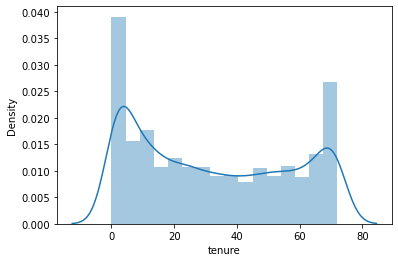

In [23]:
sns.distplot(num['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

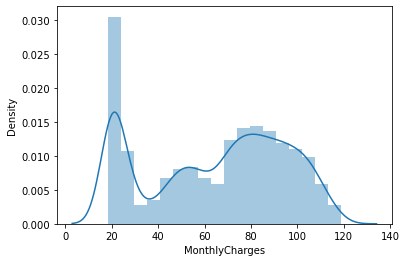

In [24]:
sns.distplot(num['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

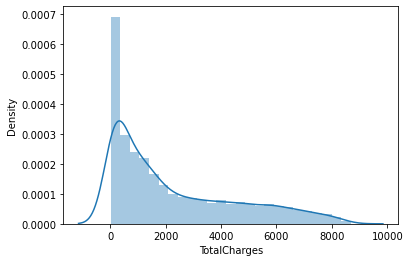

In [25]:
sns.distplot(num['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

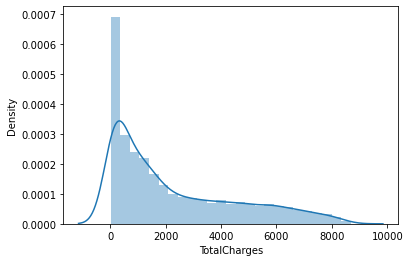

In [36]:
sns.distplot(num['TotalCharges'])

In [26]:
#Check whether SeniorCitizon feature is an indicator
num.SeniorCitizen.value_counts()  #this should be treated as object rather than numerical column.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [27]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Dropping the indicator features from num to build a separate DF

In [28]:
ind=num[['SeniorCitizen']]  #putting seniorcitizen in separate class of ind.
num=num.drop(['SeniorCitizen'],axis=1)  #removing seniorcitizen from num dataframe.

In [29]:
num.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [30]:
ind.dtypes  #seniorcitizen column which is now in int dataframe

SeniorCitizen    int64
dtype: object

In [31]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Outlier Analysis of Numerical Features

In [32]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.95,0.98,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Capping and Flooring of outliers

In [33]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

# We are capping and flooring at 1,99% because we dont want our variable to lose much of the predictive power.If too much data
# is removed, variance of the feature drops and thus predictive power also drops with it.Hence we cap 1% from both sides.

In [34]:
num1=num.apply(lambda x : outlier_cap(x))

In [35]:
num1.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Missing Value Analysis

In [42]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [ ]:
# Since the data does not contain any missing values Imputation Processes are not required
# X = X.loc[:, X.isnull().mean() <= .25]

#If there had been any column with missing values>25% , it would not be considered. Here in X, only those columns with
#missing values <25% are considered.

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [37]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)   #Here i am interested to see which features have variance= 0 and I want to drop
#such features.   #it removes all those features who have 0 variance.

varselector.fit_transform(num)
cols = varselector.get_support(indices=True)  #this step gives us the indices of all the columns whose variance is non zero.

#get_support function gives us the list of column indices. Here since varselector contains all those columns who have nonzero
#variance hence get_support gives us all those indices with nonzero variance.


num_1 = num.iloc[:,cols]  #new dataframe now consists of required columns with the non zero variance. 


#this step is used to remove all those columns which have 0 variance.Here we dont have columns with 0 variance hence no
#column gets removed here. But in cases where large number of columns are present, manually looking out columns with 0 variane
#might be tough, this method is useful at those times.

In [38]:
cols   #list of column indices with non zero variance.

array([0, 1, 2], dtype=int64)

In [39]:
num_1.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [40]:
num_1.tail()

,tenure,MonthlyCharges,TotalCharges
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60
7042,66,105.65,6844.50


The variance threshold class is an important module of the sklearn's feature selection class. It allows you to mention
a certain threshold and u essentially compare whether variance of all the features are meeting that threshold or not.
If it is not meeting that threshold requiremnet, then such features are removed after applying fit transform on it.
It is a Feature selector that removes all low-variance features.
Features with a training-set variance lower than this threshold will be removed. The default is to keep all features
with non-zero variance, i.e. remove the features that have the same value in all samples.

In [41]:
num_1.iloc[0]   #looking for the first row.

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

## Bivariate Analysis Numerical columns

In [42]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile') # quantile means All bins in each feature have the same number of points
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
#Note that discrete.fit_transform(num_1) gives an array, hence we transform it to dataframe.
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


In [55]:
num_1.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [48]:
discrete.fit_transform(num_1)

array([[0., 2., 0.],
       [5., 3., 5.],
       [1., 3., 1.],
       ...,
       [2., 2., 2.],
       [1., 5., 2.],
       [8., 9., 9.]])

In [49]:
num_1.index

RangeIndex(start=0, stop=7043, step=1)

In [51]:
num_1.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [64]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

In [65]:
X_bin_combined.head()

,target,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0,0.0,2.0,0.0
1,0,5.0,3.0,5.0
2,1,1.0,3.0,1.0
3,0,6.0,2.0,5.0
4,1,1.0,5.0,1.0


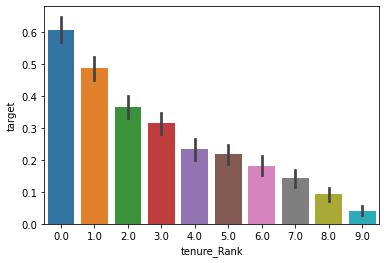

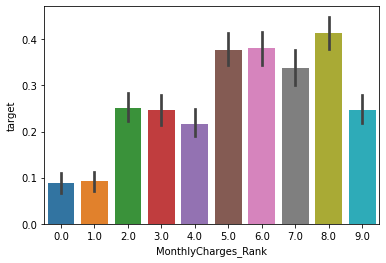

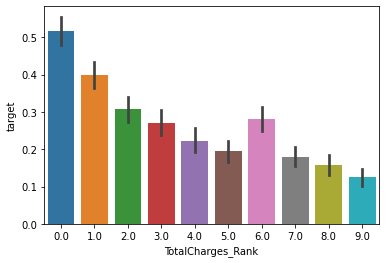

In [66]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)



from numpy import mean
for col in (num_binned.columns):
    plt.figure()
   # sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

Here we can see that all the 3 features show good discriminatory power. They have either +ve or-ve slopes.Hence we keep
all of them in a new dataframe called select_features_df_num as given below.

In [57]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [68]:
select_features_df_num.shape

(7043, 3)

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis- Categorical Columns

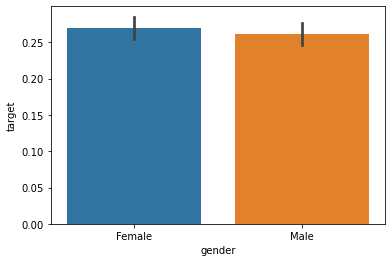

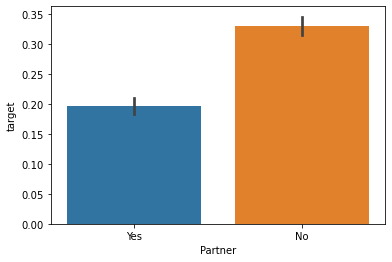

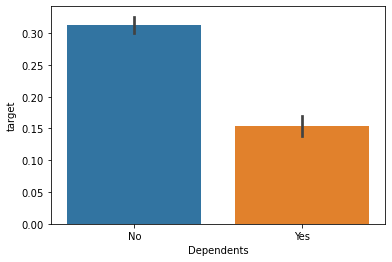

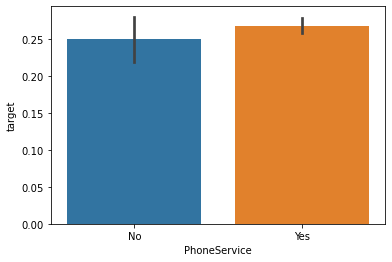

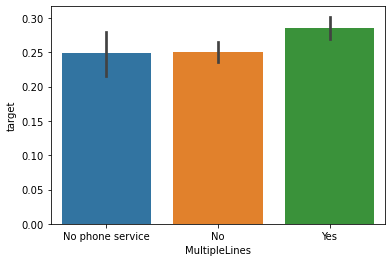

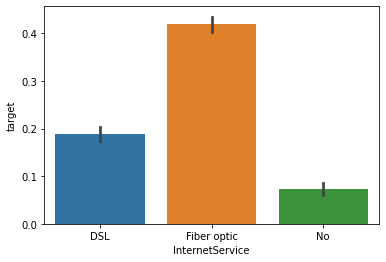

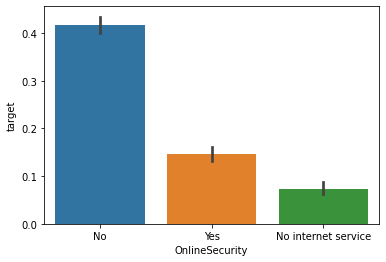

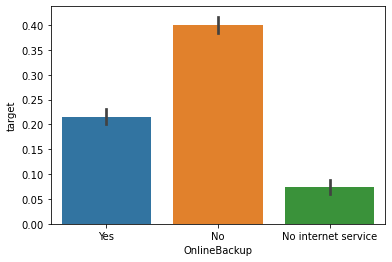

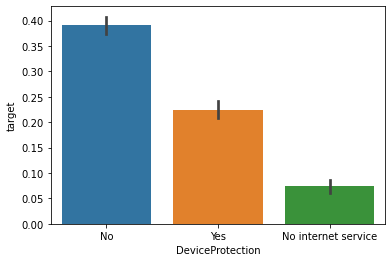

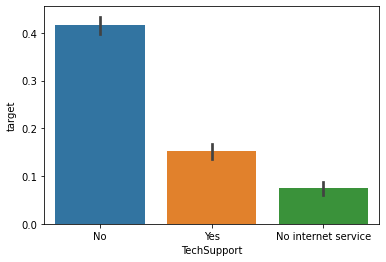

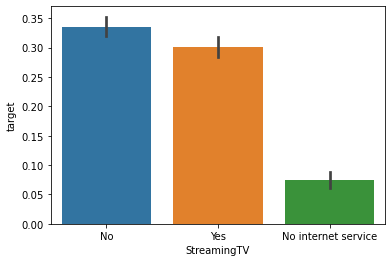

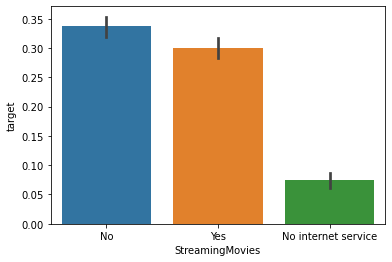

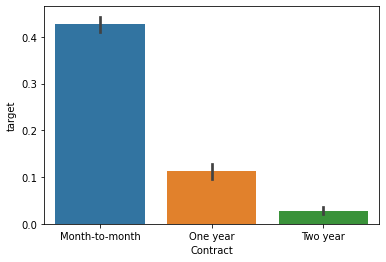

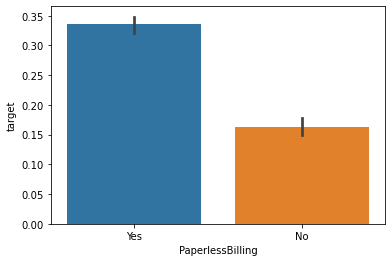

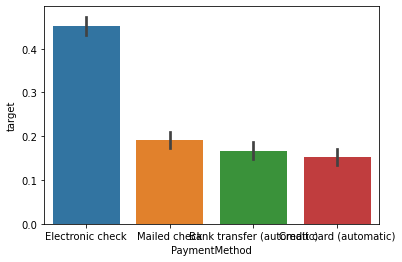

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    #sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [47]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)  #as evident from the above graph, these 3 variables are
#flat. Hence they are expected to be poor predictors since they have no discriminatory power, hence we remove them from
#our analysis.

In [48]:
char.shape

(7043, 12)

In [49]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True) #dropfirst is implemented to avoid dummy variable trap.
X_char_dum.shape

(7043, 22)

In [50]:
X_char_dum.head()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Part 2 - Select K Best

In [51]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)    #this gives indexes of those columns which got selected.
select_features_df_char = X_char_dum.iloc[:,cols]

In [53]:
len(cols)

20

In [74]:
select_features_df_char.shape

(7043, 20)

# Feature Selection - Numerical Indicator Features 

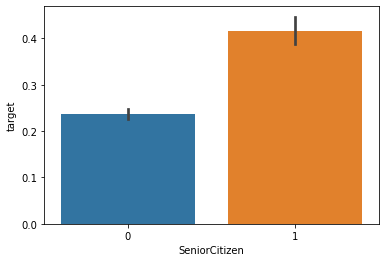

In [54]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [55]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [58]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=99)

In [61]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Churn Rate in Training Data",y_train.mean())
print("Churn Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Churn Rate in Training Data target    0.265314
dtype: float64
Churn Rate in Testing Data target    0.265499
dtype: float64


# Model Building Step

In [62]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=99)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=99)

In [65]:
logreg.coef_[0]

array([ 5.96270844e-02, -1.93454432e-01,  5.92839535e-01, -1.67082816e-01,
       -1.67082816e-01, -5.82906977e-01, -1.67082816e-01, -2.64389023e-01,
       -1.67082816e-01, -2.61357215e-02, -1.67082816e-01, -4.99328203e-01,
       -1.67082816e-01, -1.67082816e-01, -3.43297355e-01, -6.57281908e-01,
        4.95672640e-01, -1.59726446e-01,  2.52794952e-01, -3.45202521e-03,
       -6.42746012e-02,  1.31334724e-03,  3.75912752e-04,  2.88408539e-01])

In [66]:
coeff_df=pd.DataFrame(X_all.columns)   #gives names of all columns in the dataframe
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.059627
1,Dependents_Yes,-0.193454
2,InternetService_Fiber optic,0.592840
3,InternetService_No,-0.167083
4,OnlineSecurity_No internet service,-0.167083
5,OnlineSecurity_Yes,-0.582907
6,OnlineBackup_No internet service,-0.167083
7,OnlineBackup_Yes,-0.264389
8,DeviceProtection_No internet service,-0.167083
9,DeviceProtection_Yes,-0.026136


In [67]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=99)

In [69]:
#np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = -1)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)  #gives the best parameters.

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [70]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=99)

In [71]:
!pip install pydotplus

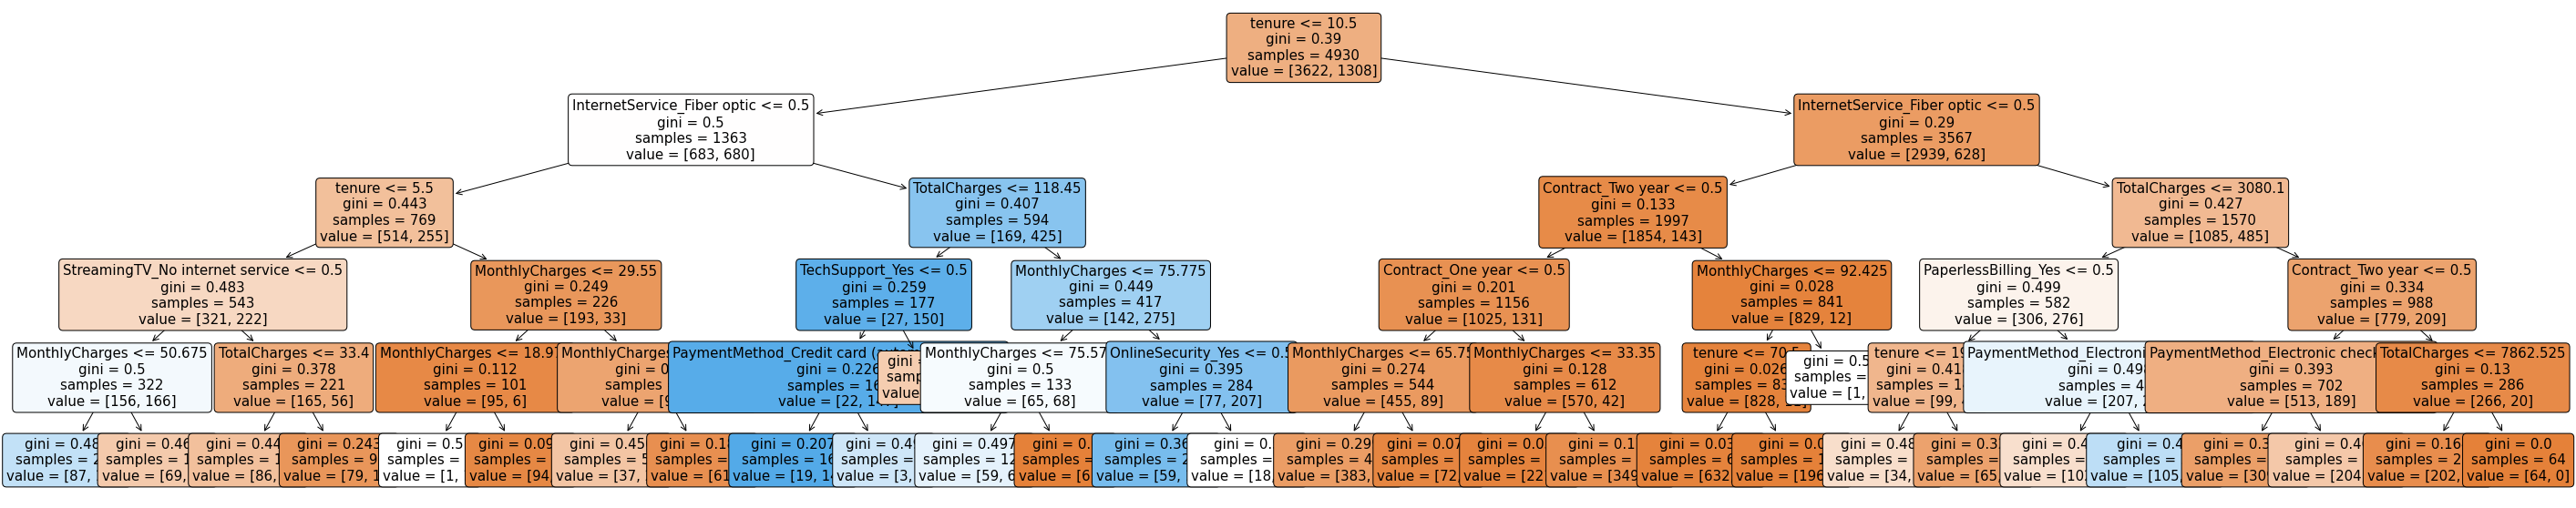

In [72]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [76]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=99)

In [77]:
rf.feature_importances_

array([0.00522574, 0.00317083, 0.13008152, 0.01662934, 0.02240171,
       0.0349442 , 0.01516383, 0.01172894, 0.02455327, 0.00624142,
       0.01873944, 0.02490222, 0.01346414, 0.01510418, 0.03661775,
       0.09080221, 0.02788959, 0.00412654, 0.09550737, 0.00160754,
       0.21460281, 0.05476617, 0.12773723, 0.00399201])

In [78]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False) #sorting the values in descending order.
feature_importances

,importance
tenure,0.214603
InternetService_Fiber optic,0.130082
TotalCharges,0.127737
PaymentMethod_Electronic check,0.095507
Contract_Two year,0.090802
MonthlyCharges,0.054766
Contract_One year,0.036618
OnlineSecurity_Yes,0.034944
PaperlessBilling_Yes,0.027890
TechSupport_Yes,0.024902


In [79]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=99,max_depth=5,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=50,
                           random_state=99)

In [80]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.274615
InternetService_Fiber optic,0.185027
TotalCharges,0.160134
MonthlyCharges,0.150889
PaymentMethod_Electronic check,0.065237
Contract_Two year,0.038236
Contract_One year,0.027628
PaperlessBilling_Yes,0.025164
OnlineSecurity_Yes,0.014974
TechSupport_Yes,0.010338


In [87]:
# Model Evaluation   #Ypred values for all models(LR, DTs, RFs, GBM)
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [88]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [89]:
#LR
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7969711310932324
Precision 0.6473214285714286
Recall 0.5169340463458111
f1_score 0.5748265609514371


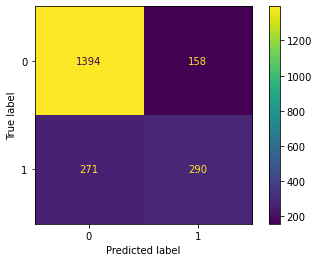

In [90]:
#LR
metrics.plot_confusion_matrix(logreg,X_test, y_test)

In [91]:
#DT
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7889256980596309
Precision 0.631578947368421
Recall 0.4919786096256685
f1_score 0.5531062124248498


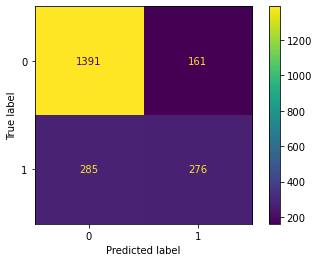

In [92]:
#DT
metrics.plot_confusion_matrix(dtree,X_test, y_test)

In [93]:
#RF
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7936583057264552
Precision 0.6731301939058172
Recall 0.43315508021390375
f1_score 0.5271149674620391


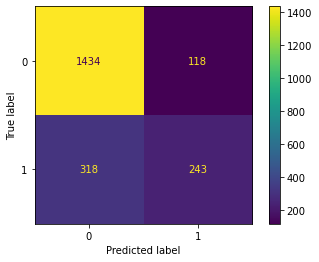

In [94]:
#RF
metrics.plot_confusion_matrix(rf,X_test, y_test)

In [95]:
#GBM
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7927117841930904
Precision 0.6357615894039735
Recall 0.5133689839572193
f1_score 0.5680473372781065


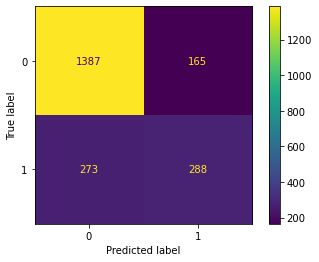

In [96]:
#GBM
metrics.plot_confusion_matrix(gbm,X_test, y_test)